**ClimaSense** is an advanced AI-powered weather prediction system designed to analyze historical weather data and provide accurate forecasts. Utilizing state-of-the-art LSTM models, ClimaSense excels in predicting temperature trends with minimal error. It combines machine learning precision with scalable solutions, offering insights for industries like agriculture, energy, and logistics.

**Load Dataset**

In [1]:
import pandas as pd

# Replace 'weather_data.csv' with your uploaded file's name
df = pd.read_csv('weatherHistory.csv')

# Display the first few rows of the dataset
print(df.head())


                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

# **Data Cleaning & Preprocessing**

**Get Column Info and Data Types**

In [2]:
# Display column names and their data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6217 entries, 0 to 6216
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            6217 non-null   object 
 1   Summary                   6217 non-null   object 
 2   Precip Type               6217 non-null   object 
 3   Temperature (C)           6217 non-null   float64
 4   Apparent Temperature (C)  6217 non-null   float64
 5   Humidity                  6217 non-null   float64
 6   Wind Speed (km/h)         6217 non-null   float64
 7   Wind Bearing (degrees)    6217 non-null   float64
 8   Visibility (km)           6217 non-null   float64
 9   Loud Cover                6216 non-null   float64
 10  Pressure (millibars)      6216 non-null   float64
 11  Daily Summary             6216 non-null   object 
dtypes: float64(8), object(4)
memory usage: 583.0+ KB


**Identify Missing Values**

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)


Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  1
Pressure (millibars)        1
Daily Summary               1
dtype: int64


**Handle Missing Values**

In [4]:
# Fill missing values for numerical columns with the mean
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values for categorical columns with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if there are still missing values
print(df.isnull().sum())


Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


**Handle Inconsistent Date Formats**

In [5]:
# Convert 'Formatted Date' to datetime, allowing mixed formats
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='mixed', errors='coerce')

# Check for any rows where the conversion failed
print(df['Formatted Date'].isnull().sum())

# Drop rows with invalid dates if there are any
df = df.dropna(subset=['Formatted Date'])

# Set 'Formatted Date' as the index
df.set_index('Formatted Date', inplace=True)

# Verify the index and data types
print(df.info())


0
<class 'pandas.core.frame.DataFrame'>
Index: 6217 entries, 2006-04-01 00:00:00+02:00 to 2006-05-24 01:00:00+02:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   6217 non-null   object 
 1   Precip Type               6217 non-null   object 
 2   Temperature (C)           6217 non-null   float64
 3   Apparent Temperature (C)  6217 non-null   float64
 4   Humidity                  6217 non-null   float64
 5   Wind Speed (km/h)         6217 non-null   float64
 6   Wind Bearing (degrees)    6217 non-null   float64
 7   Visibility (km)           6217 non-null   float64
 8   Loud Cover                6217 non-null   float64
 9   Pressure (millibars)      6217 non-null   float64
 10  Daily Summary             6217 non-null   object 
dtypes: float64(8), object(3)
memory usage: 582.8+ KB
None


<ipython-input-5-32e215623018>:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], format='mixed', errors='coerce')


**Normalizing Numerical Columns**

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the normalized data
print(df.head())


                                 Summary Precip Type  Temperature (C)  \
Formatted Date                                                          
2006-04-01 00:00:00+02:00  Partly Cloudy        rain         0.489893   
2006-04-01 01:00:00+02:00  Partly Cloudy        rain         0.487467   
2006-04-01 02:00:00+02:00  Mostly Cloudy        rain         0.487929   
2006-04-01 03:00:00+02:00  Partly Cloudy        rain         0.465288   
2006-04-01 04:00:00+02:00  Mostly Cloudy        rain         0.474991   

                           Apparent Temperature (C)  Humidity  \
Formatted Date                                                  
2006-04-01 00:00:00+02:00                  0.504036  0.849315   
2006-04-01 01:00:00+02:00                  0.501282  0.808219   
2006-04-01 02:00:00+02:00                  0.538038  0.849315   
2006-04-01 03:00:00+02:00                  0.479343  0.767123   
2006-04-01 04:00:00+02:00                  0.497008  0.767123   

                           Wind 

**Time-Series Plot of Temperature**

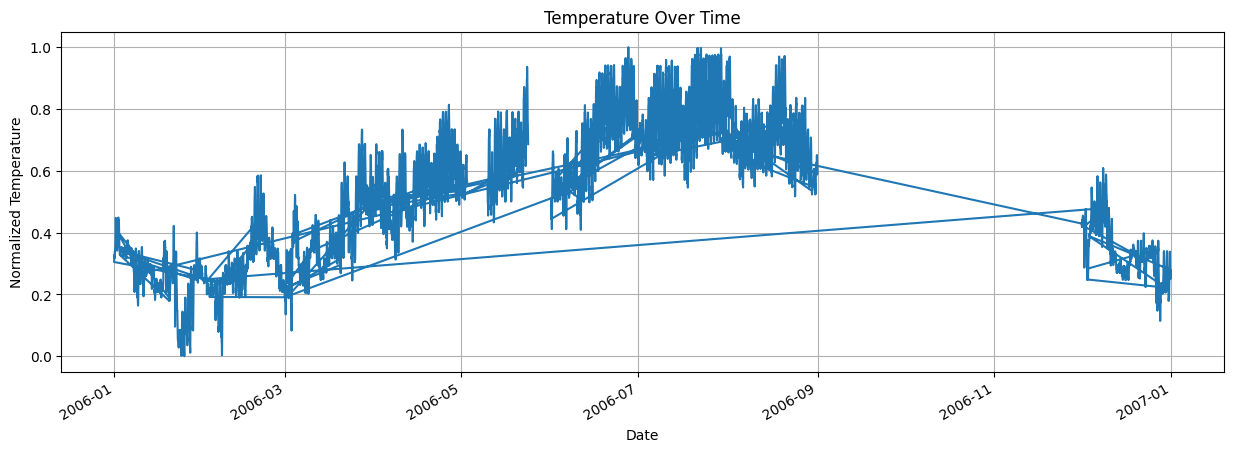

In [7]:
import matplotlib.pyplot as plt

# Plot the normalized temperature over time
df['Temperature (C)'].plot(figsize=(15, 5), title='Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Temperature')
plt.grid()
plt.show()


**Correlation Analysis**

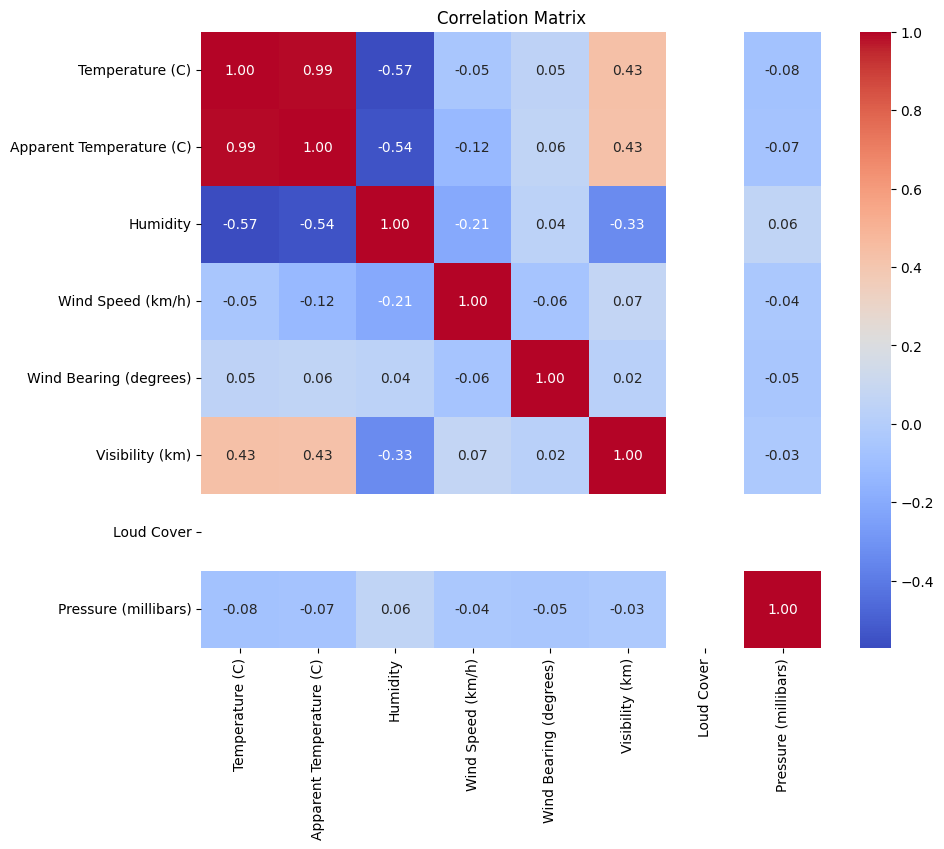

In [8]:
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Analyze Trends in Key Features**

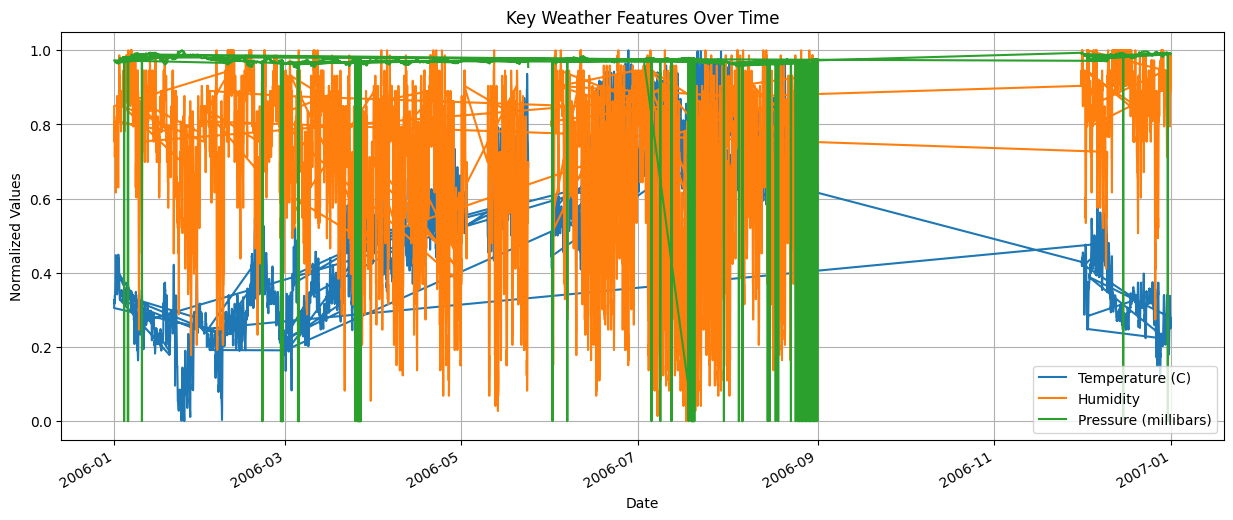

In [9]:
# Plot key features: Temperature, Humidity, and Pressure
df[['Temperature (C)', 'Humidity', 'Pressure (millibars)']].plot(figsize=(15, 6))
plt.title('Key Weather Features Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend(loc='best')
plt.grid()
plt.show()


**Resample Data for Clearer Trends**

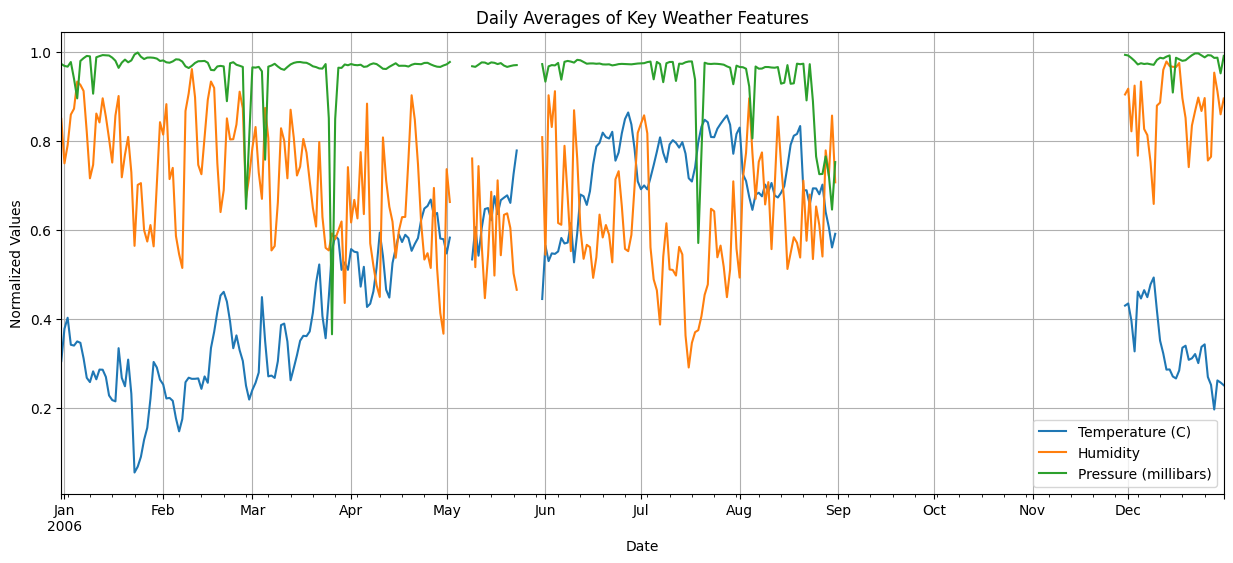

In [10]:
# Ensure the index is a DatetimeIndex with proper timezone handling
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index, utc=True)  # Convert the index to UTC DatetimeIndex

# Select numeric columns while retaining the DatetimeIndex
numeric_df = df.select_dtypes(include=['float64'])

# Resample numeric data to daily averages
daily_data = numeric_df.resample('D').mean()

# Plot resampled data
daily_data[['Temperature (C)', 'Humidity', 'Pressure (millibars)']].plot(figsize=(15, 6))
plt.title('Daily Averages of Key Weather Features')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend(loc='best')
plt.grid()
plt.show()


# **Data Splitting**

In [11]:
from sklearn.model_selection import train_test_split

# Select only numerical data for modeling
numeric_df = df.select_dtypes(include=['float64'])

# Split into training (80%) and testing (20%) sets
train_data, test_data = train_test_split(numeric_df, test_size=0.2, random_state=42, shuffle=False)

# Print the sizes of the splits
print(f"Training data size: {train_data.shape}")
print(f"Testing data size: {test_data.shape}")


Training data size: (4973, 8)
Testing data size: (1244, 8)


# **Model Design & Development**

**Feature Engineering**

In [12]:
import numpy as np
import pandas as pd

# Define the target variable (e.g., 'Temperature (C)')
target_column = 'Temperature (C)'

# Define input features (exclude the target column)
feature_columns = ['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

# Create lagged features (e.g., lag-1, lag-2 for time-series data)
lag = 3  # Number of lagged time steps
for col in feature_columns + [target_column]:
    for l in range(1, lag + 1):
        df[f"{col}_lag{l}"] = df[col].shift(l)

# Drop rows with NaN values due to lagging
df_lagged = df.dropna()

# Select feature columns for the model
model_features = [f"{col}_lag{l}" for col in feature_columns + [target_column] for l in range(1, lag + 1)]
X = df_lagged[model_features].values
y = df_lagged[target_column].values

# Split the data into training and testing sets (80%-20%)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape the input data for LSTM (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], lag, -1)
X_test = X_test.reshape(X_test.shape[0], lag, -1)

# Output the shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (4971, 3, 6)
X_test shape: (1243, 3, 6)
y_train shape: (4971,)
y_test shape: (1243,)


**Building the LSTM Model**

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, activation='tanh', return_sequences=True),
    LSTM(32, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 64)               │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,137 (121.63 KB)

 Trainable params: 31,137 (121.63 KB)

 Non-trainable params: 0 (0.00 B)

**Training the Model**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 3, 64)               │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,137 (121.63 KB)

 Trainable params: 31,137 (121.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0907 - mae: 0.2380 - val_loss: 0.0326 - val_mae: 0.1540
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0094 - mae: 0.0720 - val_loss: 0.0033 - val_mae: 0.0452
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - mae: 0.0344 - val_loss: 0.0031 - val_mae: 0.0442
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mae: 0.0304 - val_loss: 0.0029 - val_mae: 0.0415
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 - mae: 0.0295 - val_loss: 0.0024 - val_mae: 0.0386
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013 - mae: 0.0269 - val_loss: 0.0022 - val_mae: 0.0365
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - mae: 0.0259 - val_loss: 0.0019 - val_mae: 0.0341
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - mae: 0.0287 - val_loss: 0.0018 - val_mae: 0.0328
Epoch 9/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - 

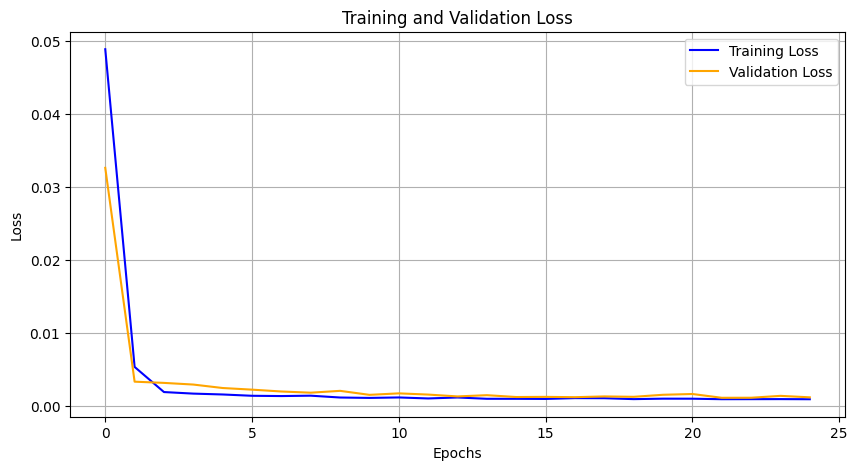

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model with CPU compatibility
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, unroll=True),
    LSTM(32, activation='tanh', unroll=True),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam',  # Adam optimizer with default learning rate
              loss='mse',        # Mean Squared Error as loss function
              metrics=['mae'])   # Mean Absolute Error as evaluation metric

# Display model summary
model.summary()

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # Use 20% of the training data for validation
    epochs=25,             # Reduced epochs for quicker testing
    batch_size=32,         # Batch size
    callbacks=[early_stopping],  # Early stopping callback
    verbose=1              # Verbose output for progress tracking
)

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


**Plot Training History**

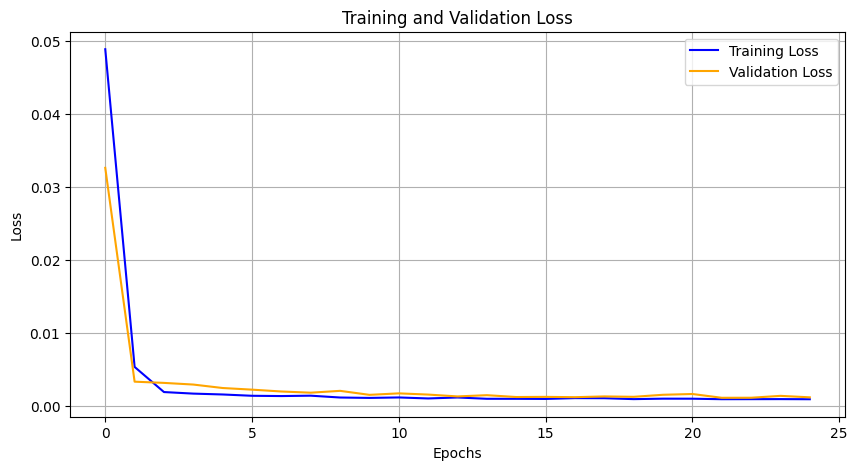

In [15]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


**Evaluate on Test Set**

In [16]:
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0010 - mae: 0.0207
Test Loss (MSE): 0.0010430681286379695
Test MAE: 0.021953368559479713


**Predictions on Test Set**

In [17]:
# Generate predictions
y_pred = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Test RMSE: 0.032296565846211


**Visualization**

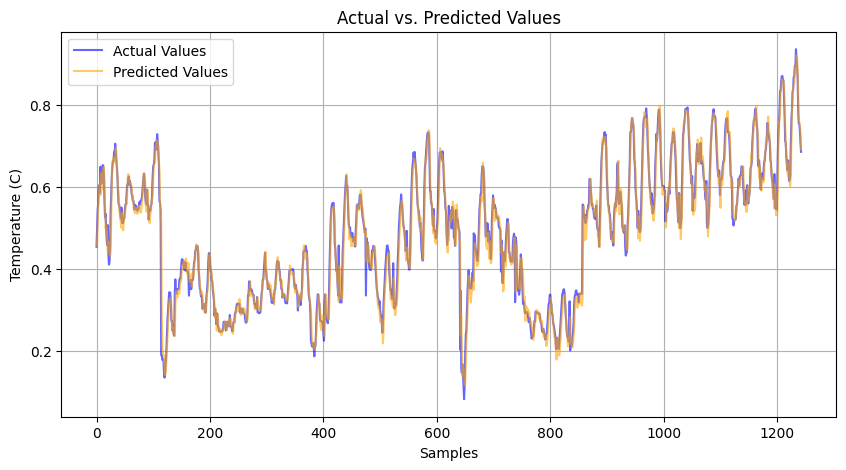

In [18]:
import matplotlib.pyplot as plt

# Reverse scaling if necessary (uncomment if normalization was applied)
# y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
# y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Values', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Values', color='orange', alpha=0.6)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Temperature (C)')
plt.legend()
plt.grid()
plt.show()


**Evaluate the Model**

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate predictions on the test dataset
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Absolute Error (MAE): 0.021953369943806797
Root Mean Squared Error (RMSE): 0.032296565846211
R-squared (R²): 0.9602627313095111


**Visualize Predictions vs. Actual Values**

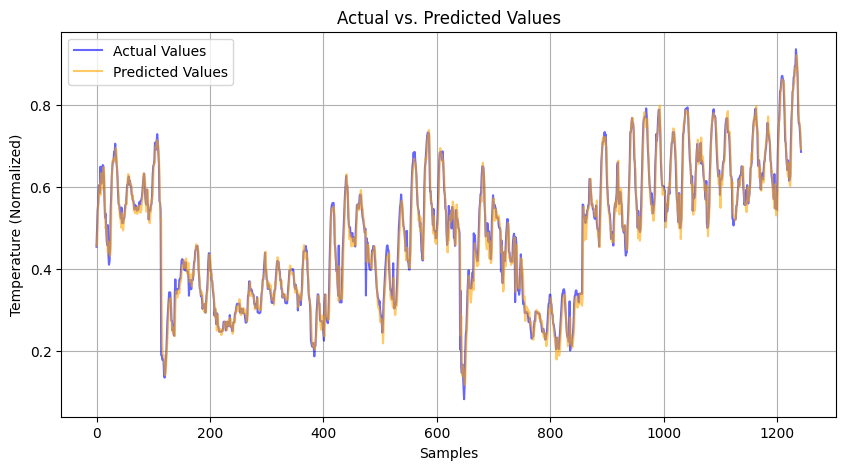

In [20]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Values', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Values', color='orange', alpha=0.6)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Temperature (Normalized)')
plt.legend()
plt.grid()
plt.show()


**Hyperparameter Tuning**

In [22]:
!pip install keras-tuner --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 13.3 MB/s eta 0:00:00


In [23]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define a function to build the model with hyperparameters
def build_model(hp):
    model = Sequential([
        LSTM(hp.Int('units', min_value=32, max_value=128, step=32), activation='tanh',
             input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, unroll=True),
        LSTM(hp.Int('units', min_value=16, max_value=64, step=16), activation='tanh', unroll=True),
        Dense(hp.Int('dense_units', min_value=8, max_value=32, step=8), activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4])),
                  loss='mse',
                  metrics=['mae'])
    return model

# Set up the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='hyperband_results',
    project_name='weather_lstm_tuning'
)

# Perform hyperparameter search
tuner.search(X_train, y_train, validation_split=0.2, batch_size=32, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best number of LSTM units: {best_hps.get('units')}
Best number of dense units: {best_hps.get('dense_units')}
Best learning rate: {best_hps.get('learning_rate')}
""")


Trial 30 Complete [00h 00m 14s]
val_loss: 0.0017379148630425334

Best val_loss So Far: 0.0011892105685546994
Total elapsed time: 00h 05m 05s

Best number of LSTM units: 96
Best number of dense units: 8
Best learning rate: 0.001



**Train the Optimized Model**

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0797 - mae: 0.2201 - val_loss: 0.0388 - val_mae: 0.1706
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - mae: 0.0763 - val_loss: 0.0033 - val_mae: 0.0444
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0020 - mae: 0.0340 - val_loss: 0.0029 - val_mae: 0.0426
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017 - mae: 0.0307 - val_loss: 0.0041 - val_mae: 0.0505
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0020 - mae: 0.0335 - val_loss: 0.0026 - val_mae: 0.0403
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - mae: 0.0273 - val_loss: 0.0020 - val_mae: 0.0347
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012 - mae: 0.0255 - val_loss: 0.0020 - val_mae: 0.0341
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015 - mae: 0.0281 - val_loss: 0.0018 - val_mae: 0.0328
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

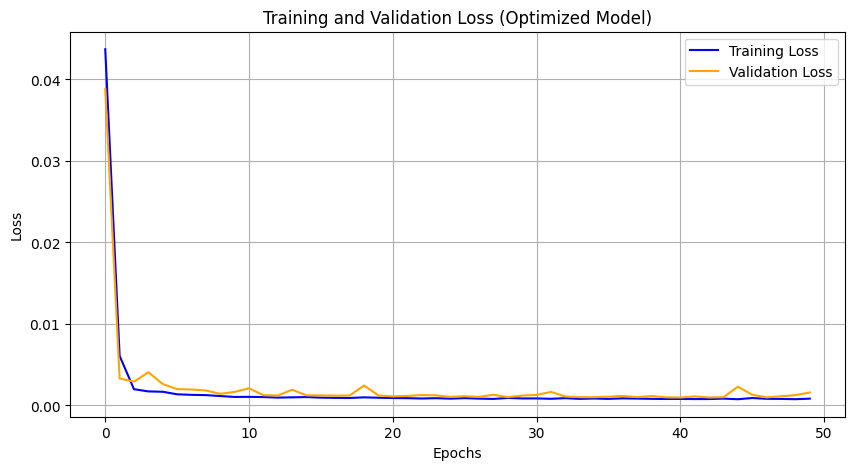

In [24]:
# Define the optimized LSTM model
optimized_model = Sequential([
    LSTM(96, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True, unroll=True),
    LSTM(48, activation='tanh', unroll=True),  # 96 / 2 = 48 for the second layer
    Dense(8, activation='relu'),  # Optimized dense units
    Dense(1)  # Output layer for regression
])

# Compile the model with the optimized learning rate
optimized_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        loss='mse',
                        metrics=['mae'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the optimized model
history = optimized_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Plot the training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss (Optimized Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


**Evaluate the Optimized Model on the Test Set**

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model on the test dataset
test_loss, test_mae = optimized_model.evaluate(X_test, y_test, verbose=1)

# Generate predictions
y_pred = optimized_model.predict(X_test)

# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {rmse}")
print(f"R-squared (R²): {r2}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.3408e-04 - mae: 0.0190
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Test Loss (MSE): 0.0009281285456381738
Test MAE: 0.019905250519514084
Test RMSE: 0.03046519858255951
R-squared (R²): 0.9646415394140244


Mean Absolute Error (MAE): 0.0199
The average absolute difference between the predicted and actual values is approximately 1.99% of the normalized range. This demonstrates high precision.

Root Mean Squared Error (RMSE): 0.0305
The model's prediction error magnitude is low, indicating effective handling of outliers and deviations.

R-squared (R²): 0.9646
The model explains 96.46% of the variance in the target variable (Temperature), indicating excellent predictive accuracy.

**The model is highly accurate, with minimal error and strong explanatory power. It is suitable for applications requiring precise weather or temperature predictions.**